# EDA

In [ ]:
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import pyspark

In [ ]:
spark = pyspark.sql.SparkSession.builder.getOrCreate()

In [ ]:
data = spark.read.csv("Player_Attributes.csv",
                     sep=',',
                     inferSchema=True,
                     header=True,
                     multiLine=True)

data.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- id: integer (nullable = true)
 |-- player_fifa_api_id: integer (nullable = true)
 |-- player_api_id: integer (nullable = true)
 |-- date: timestamp (nullable = true)
 |-- overall_rating: double (nullable = true)
 |-- potential: double (nullable = true)
 |-- preferred_foot: string (nullable = true)
 |-- attacking_work_rate: string (nullable = true)
 |-- defensive_work_rate: string (nullable = true)
 |-- crossing: double (nullable = true)
 |-- finishing: double (nullable = true)
 |-- heading_accuracy: double (nullable = true)
 |-- short_passing: double (nullable = true)
 |-- volleys: double (nullable = true)
 |-- dribbling: double (nullable = true)
 |-- curve: double (nullable = true)
 |-- free_kick_accuracy: double (nullable = true)
 |-- long_passing: double (nullable = true)
 |-- ball_control: double (nullable = true)
 |-- acceleration: double (nullable = true)
 |-- sprint_speed: double (nullable = true)
 |-- agility: double (nullable = tru

## Data Cleaning


In [ ]:
# these columns are useless to us, drop them
drop_cols = ['_c0', 'id']

data = data.drop(*drop_cols)

In [ ]:
data = data.na.drop()

In [ ]:
print((data.count(), len(data.columns)))

(180354, 41)


In [ ]:
pd.set_option('display.max_columns', None)
data.limit(3).toPandas()

,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes\r
0,218353,505942,2016-02-18,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0\r
1,218353,505942,2015-11-19,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0\r
2,218353,505942,2015-09-21,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0\r


In [ ]:
data.registerTempTable('data')

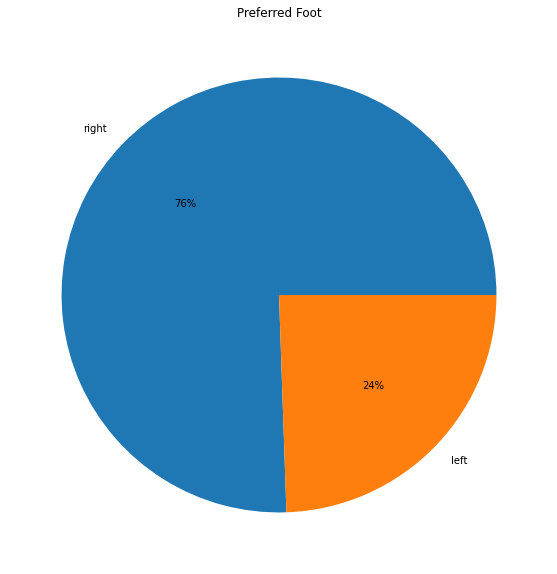

In [ ]:
df = spark.sql('SELECT preferred_foot FROM data').toPandas()

plt.figure(figsize=(10,10))
labels = list(df['preferred_foot'].unique())
plt.pie(df['preferred_foot'].value_counts(), labels = labels, autopct='%.0f%%')
plt.title('Preferred Foot')
plt.show()

The vast majority prefer right foot

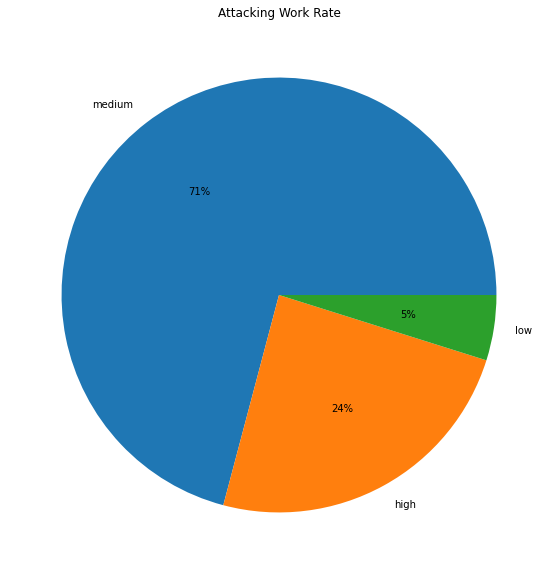

In [ ]:
df = spark.sql('SELECT attacking_work_rate FROM data').toPandas()

plt.figure(figsize=(10,10))
count = df['attacking_work_rate'].value_counts().nlargest(3)
labels = count.index
plt.pie(count, labels = labels, autopct='%.0f%%')
plt.title('Attacking Work Rate')
plt.show()

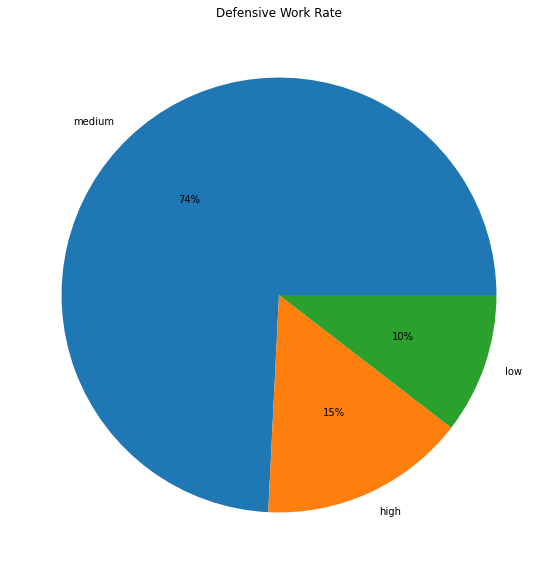

In [ ]:
df = spark.sql('SELECT defensive_work_rate FROM data').toPandas()

plt.figure(figsize=(10,10))
count = df['defensive_work_rate'].value_counts().nlargest(3)
labels = count.index
plt.pie(count, labels = labels, autopct='%.0f%%')
plt.title('Defensive Work Rate')
plt.show()

Text(0.5, 1.0, 'Overall Rating Distribution')

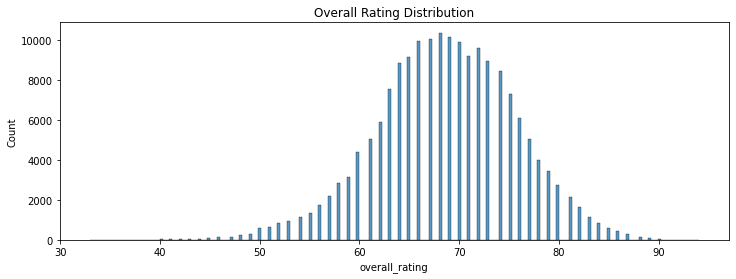

In [ ]:
df = spark.sql('SELECT overall_rating FROM data').toPandas()

plt.figure(figsize=(12,4))
sns.histplot(data=df, x='overall_rating')
plt.title('Overall Rating Distribution')

Text(0.5, 1.0, 'Potential Distribution')

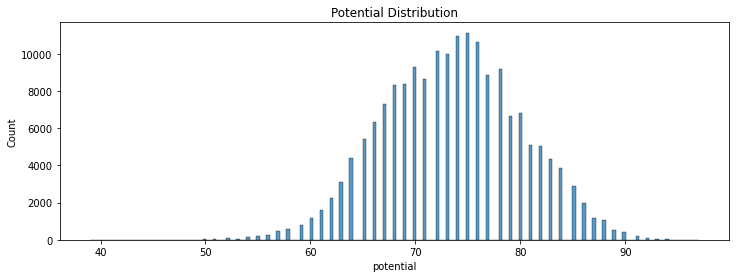

In [ ]:
df = spark.sql('SELECT potential FROM data').toPandas()

plt.figure(figsize=(12,4))
sns.histplot(data=df, x='potential')
plt.title('Potential Distribution')

Text(0.5, 1.0, "Player's Overall Rating Against Potential")

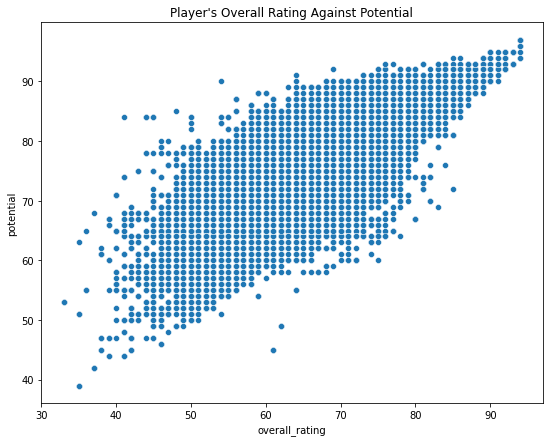

In [ ]:
df = spark.sql('SELECT overall_rating, potential FROM data').toPandas()
plt.figure(figsize=(9,7))
sns.scatterplot(data=df, x='overall_rating', y='potential')
plt.title('Player\'s Overall Rating Against Potential')

Players' overall rating and potential have strong positive correlation

Text(0.5, 1.0, "Player's Overall Rating Against Reactions")

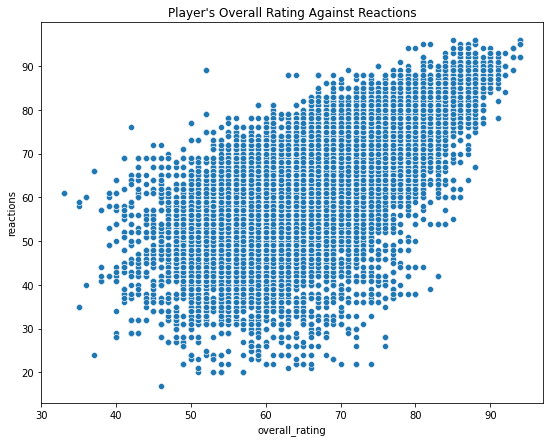

In [ ]:
df = spark.sql('SELECT overall_rating, reactions FROM data').toPandas()
plt.figure(figsize=(9,7))
sns.scatterplot(data=df, x='overall_rating', y='reactions')
plt.title('Player\'s Overall Rating Against Reactions')

Players' overall rating and reactions have strong positive correlation



A function to draw boxplots based on the columns passed to it

In [ ]:
def box_plot(cal1, col2):
    df = spark.sql(f'SELECT {col2}, {cal1} FROM data').toPandas()

    medium = df[df[cal1] == 'medium'][col2]
    high = df[df[cal1] == 'high'][col2]
    low = df[df[cal1] == 'low'][col2]

    fig, ax = plt.subplots(1, 1,figsize=(4,6))
    sns.boxplot(x=cal1,y=col2,
                data=pd.DataFrame({col2:pd.concat([medium,high,low],axis=0),
                                  cal1:np.repeat(["medium","high","low"],[len(medium),len(high),len(low)])}),
                ax = ax,width=0.5)

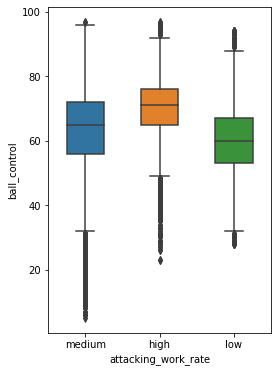

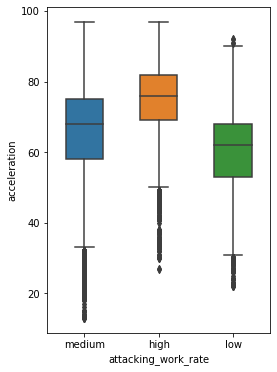

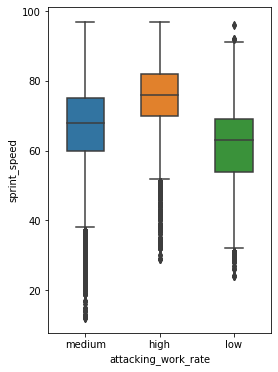

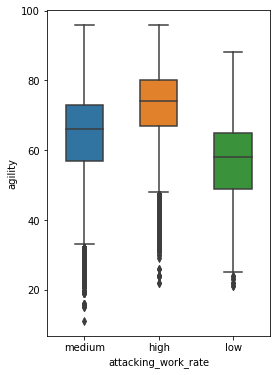

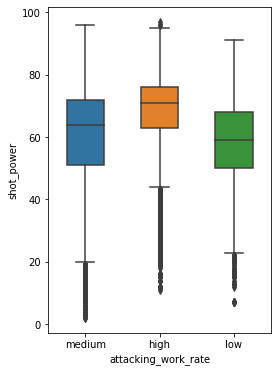

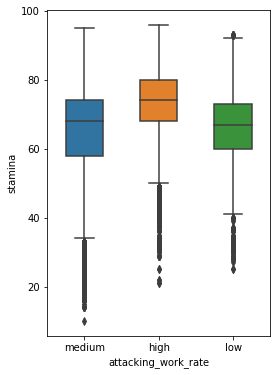

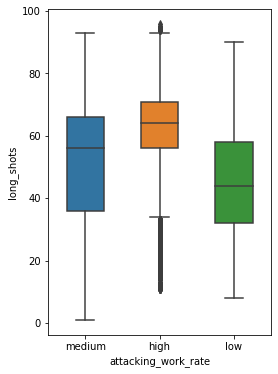

In [ ]:
cols = ['ball_control','acceleration','sprint_speed','agility','shot_power','stamina','long_shots']
group_by = 'attacking_work_rate'
for col in cols:
    box_plot(group_by, col)

Players who have high attacking work rate tend to have higher scores on these features :
- ball_control
- acceleration
- sprint_speed
- agility
- shot_power
- stamina
- long_shots

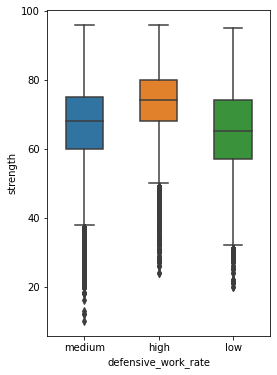

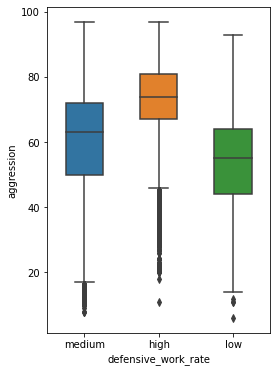

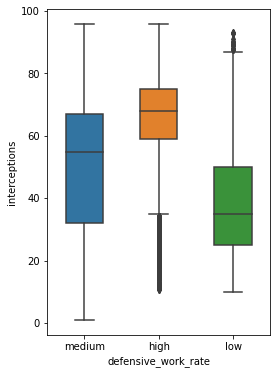

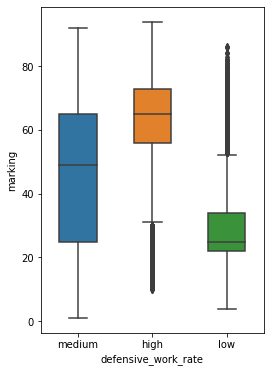

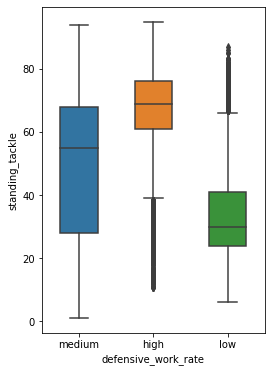

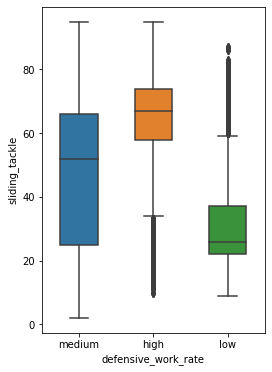

In [ ]:
cols = ['strength','aggression','interceptions','marking','standing_tackle','sliding_tackle']
group_by = 'defensive_work_rate'
for col in cols:
    box_plot(group_by, col)

Players who have high defensive work rate tend to have higher scores on these features :
- strength
- aggression
- interceptions
- marking
- standing_tackle
- sliding_tackle